In [1]:
import pandas as pd

df = pd.read_csv('a1_data.csv')
X = df.values

In [3]:
import numpy as np

np.mean(np.var(X, axis=0))

0.22452269967588265

In [38]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLarsIC
import numpy as np

def sortnregress(X, alpha, fit_intercept):
    lasso = Lasso(alpha, fit_intercept=fit_intercept) # TODO do we fit an intercept?

    d = X.shape[1]
    W = np.zeros((d, d))
    increasing = np.argsort(np.var(X, axis=0))
    for k in range(1, d):
        covariates = increasing[:k]
        target = increasing[k]
        lasso.fit(X[:, covariates], X[:, target].ravel())
        weight = np.abs(lasso.coef_)
        # convert to 0-1
        weight[weight > 0] = 1
        
        W[covariates, target] = weight
    return W

In [39]:
eval = []
for alpha in np.arange(0.001, 0.1, 0.001):
    W = sortnregress(X, alpha, fit_intercept=True)
    n_edges = np.sum(W != 0)
    pred = X @ W
    res = pred - X
    mse = np.mean(res**2)
    var = np.mean(np.var(res, axis=0))
    eval.append([alpha, n_edges, mse, var])
df = pd.DataFrame(eval, columns=['alpha', 'n_edges', 'mse', 'var'])
pd.set_option('display.max_rows', 500)
df

,alpha,n_edges,mse,var
0,0.001,52,257.027325,1.238187
1,0.002,49,241.588508,1.165420
2,0.003,45,195.848663,1.039042
3,0.004,39,149.125839,0.891013
4,0.005,37,137.558370,0.840173
5,0.006,32,86.123691,0.703182
6,0.007,28,61.252313,0.581219
7,0.008,28,61.252313,0.581219
8,0.009,25,54.608203,0.524597
9,0.010,23,50.321224,0.505265


B -> A (1.0)
E -> D (1.0)
F -> J (1.0)
G -> F (1.0)
H -> G (1.0)
I -> J (1.0)
I -> K (1.0)


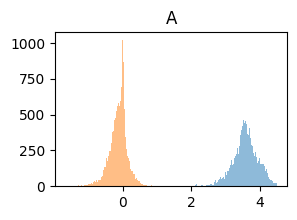

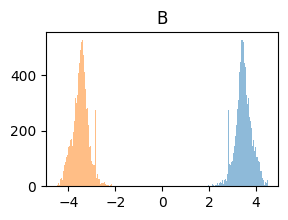

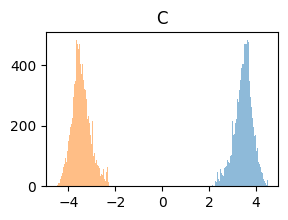

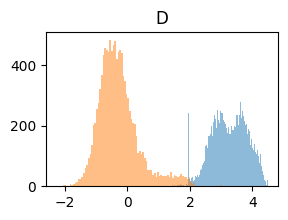

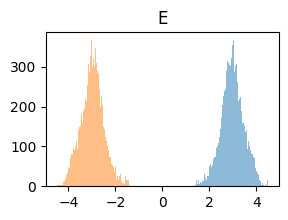

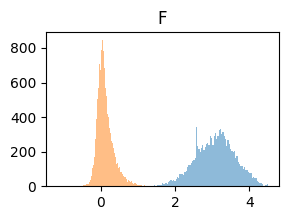

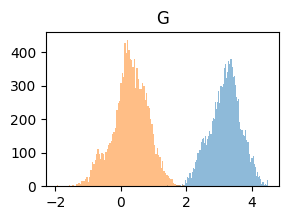

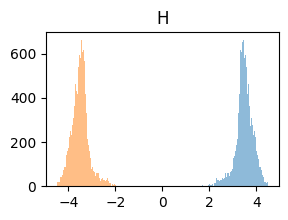

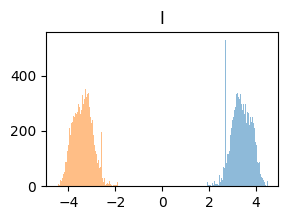

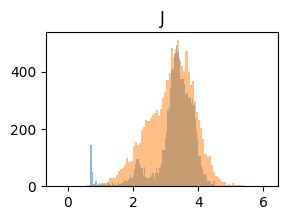

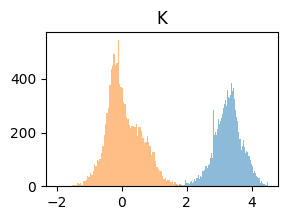

In [53]:
import matplotlib.pyplot as plt

W = sortnregress(X, 0.037, fit_intercept=True)
n_edges = np.sum(W != 0)
pred = X @ W
res = pred - X
mse = np.mean(res**2)
var = np.mean(np.var(res, axis=0))
# print names of the edges
for i in range(11):
    for j in range(11):
        if W[i, j] != 0:
            print(f'{df.columns[i]} -> {df.columns[j]} ({W[i, j]})')
for i in range(11):
    # plot values and residuals
    plt.figure(figsize=(3, 2))
    plt.hist(X[:, i], label='true', alpha=0.5, bins=100)
    # plt.hist(pred[:, i], label='predicted', alpha=0.5, bins=100)
    plt.hist(res[:, i], label='residual', alpha=0.5, bins=100)
    # plt.legend()
    plt.title(df.columns[i])
    plt.show()
    

In [35]:
eval = []
for alpha in np.arange(0.5, 20, 0.5):
    W = sortnregress(X, alpha, fit_intercept=False)
    n_edges = np.sum(W != 0)
    pred = X @ W
    res = pred - X
    mse = np.mean(res**2)
    var = np.mean(np.var(res, axis=0))
    eval.append([alpha, n_edges, mse, var])
df = pd.DataFrame(eval, columns=['alpha', 'n_edges', 'mse', 'var'])
pd.set_option('display.max_rows', 500)
df

,alpha,n_edges,mse,var
0,0.5,36,107.695533,0.743789
1,1.0,26,41.841141,0.505505
2,1.5,25,38.308405,0.487058
3,2.0,21,22.507443,0.412245
4,2.5,20,18.848075,0.400793
5,3.0,17,10.800027,0.388288
6,3.5,15,8.102800,0.362102
7,4.0,12,4.316856,0.346041
8,4.5,10,1.527873,0.332277
9,5.0,10,1.527873,0.332277


In [ ]:
df.head()